In [1]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

Using TensorFlow backend.


In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 188us/step - loss: 0.2300 - acc: 0.9279 - val_loss: 0.1209 - val_acc: 0.9641
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0852 - acc: 0.9730 - val_loss: 0.0746 - val_acc: 0.9768
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0552 - acc: 0.9826 - val_loss: 0.0691 - val_acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0389 - acc: 0.9880 - val_loss: 0.0746 - val_acc: 0.9782
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0821 - val_acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0219 - acc: 0.9930 - val_loss: 0.1014 - val_acc: 0.9762
Epoch 7/10
60000/60000 [

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10197307052112774
Test accuracy: 0.983


In [0]:
from keras import optimizers
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

In [9]:
# Compile model using above optimizer
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0046 - acc: 0.9986 - val_loss: 0.0909 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0028 - acc: 0.9993 - val_loss: 0.0889 - val_acc: 0.9840
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0878 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0870 - val_acc: 0.9842
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0865 - val_acc: 0.9844
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0861 - val_acc: 0.9843
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0858 - val_acc

In [0]:
from keras import optimizers
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [11]:
# Compile model using above optimizer
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0102 - acc: 0.9969 - val_loss: 0.0991 - val_acc: 0.9831
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0085 - acc: 0.9973 - val_loss: 0.1149 - val_acc: 0.9799
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0071 - acc: 0.9980 - val_loss: 0.1150 - val_acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.1123 - val_acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0072 - acc: 0.9979 - val_loss: 0.1167 - val_acc: 0.9826
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0053 - acc: 0.9984 - val_loss: 0.1280 - val_acc: 0.9825
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0047 - acc: 0.9985 - val_loss: 0.1212 - val_acc

In [0]:
from keras import optimizers
ada=keras.optimizers.Adagrad(lr=0.01)

In [13]:
# Compile model using above optimizer
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0366 - acc: 0.9952 - val_loss: 0.1207 - val_acc: 0.9841
Epoch 2/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.1132 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 7.7706e-04 - acc: 0.9999 - val_loss: 0.1197 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 5.8555e-04 - acc: 1.0000 - val_loss: 0.1170 - val_acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 5.6323e-04 - acc: 1.0000 - val_loss: 0.1170 - val_acc: 0.9845
Epoch 6/10
60000/60000 [==============================] - 2s 42us/step - loss: 5.5613e-04 - acc: 1.0000 - val_loss: 0.1169 - val_acc: 0.9845
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 5.5405e-04 - acc: 1.0000 - val_lo

In [0]:
from keras import optimizers
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

In [15]:
# Compile model using above optimizer
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 5.4974e-04 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9844
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 5.4777e-04 - acc: 1.0000 - val_loss: 0.1172 - val_acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 5.4649e-04 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 5.4559e-04 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 5.4487e-04 - acc: 1.0000 - val_loss: 0.1172 - val_acc: 0.9844
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 5.4432e-04 - acc: 1.0000 - val_loss: 0.1172 - val_acc: 0.9844
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss: 5.4384e-04 - acc: 1.0000 

In [0]:
from keras import optimizers
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [17]:
# Compile model using above optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0209 - acc: 0.9952 - val_loss: 0.1246 - val_acc: 0.9809
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0118 - acc: 0.9970 - val_loss: 0.1584 - val_acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0138 - acc: 0.9965 - val_loss: 0.1041 - val_acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0082 - acc: 0.9975 - val_loss: 0.1108 - val_acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0104 - acc: 0.9970 - val_loss: 0.1247 - val_acc: 0.9797
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0084 - acc: 0.9976 - val_loss: 0.1403 - val_acc: 0.9765
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0143 - acc: 0.9962 - val_loss: 0.1073 - val_acc

In [0]:
from keras import optimizers
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)

In [19]:
# Compile model using above optimizer
model.compile(optimizer=nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0310 - acc: 0.9923 - val_loss: 0.1188 - val_acc: 0.9784
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0220 - acc: 0.9940 - val_loss: 0.1248 - val_acc: 0.9768
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0176 - acc: 0.9947 - val_loss: 0.1195 - val_acc: 0.9777
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0196 - acc: 0.9948 - val_loss: 0.1159 - val_acc: 0.9783
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0212 - acc: 0.9939 - val_loss: 0.1283 - val_acc: 0.9779
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0177 - acc: 0.9949 - val_loss: 0.1595 - val_acc: 0.9726
Epoch 7/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0152 - acc: 0.9956 - val_loss: 0.1232 - val_acc

In [0]:
from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

In [22]:
# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.1017 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 6.5731e-04 - acc: 1.0000 - val_loss: 0.1006 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 5.8490e-04 - acc: 1.0000 - val_loss: 0.1018 - val_acc: 0.9846
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 5.6714e-04 - acc: 1.0000 - val_loss: 0.1028 - val_acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 5.5723e-04 - acc: 1.0000 - val_loss: 0.1039 - val_acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 5.5062e-04 - acc: 1.0000 - val_loss: 0.1049 - val_acc: 0.9848
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 5.4583e-04 - acc: 1.0000 - va

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


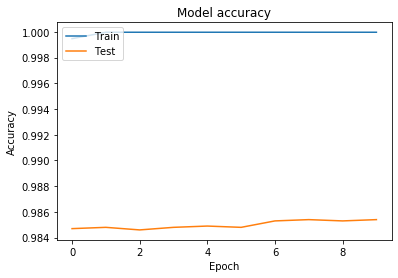

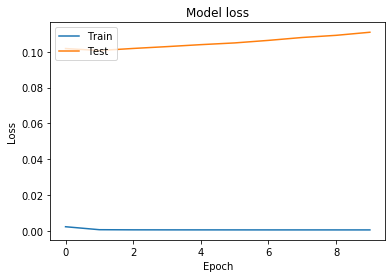

In [23]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

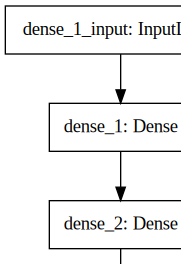

In [21]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))